# Final Tutorial
Ryan Dunn, Maria Suplee, and Camille Veselka

# Table of Contents

[Introduction](#Introduction)

[Data Acquisition](#Data-Acquistion)

[Data Preparation](#Data-Preparation)

[Visualiztion](#Visualization)

[Learning models and statistical Analysis](#Learning-Models-and-Statistical-Analysis)

[Citations](#Citations)


# Introduction

As gender becomes an increasingly relevant topic to society it becomes necessary to examine how gender affects the way in which humans make choices and form preferences in daily life. While, many hold assumptions and opinions on female versus male preferences it is essential to determine, which of these assumptions are accurate and which are rooted in stereotype and bias. We seek to determine how gender actually affects lifestyle and preferences by using statistical evidence as opposed to long held assumptions. This pursuit will lead to a better understanding of how gender affects lifestyles and the choices humans make every day. With this information we will use a machine learning algorithm to predict gender based on self report responses pertaining to lifestyle and preferences. This algorithm could have potential benefits to private enterprise (creating more targeted marketing), society (assisting in gender based policy decisions) and data science (assisting future researchers in gender prediction to interpolate missing data and gender studies).

The data set we are using is a collection of data from a survey conducted on 1010 slovenian young people (ages 16 to 30) by a group students enrolled in a statistics class at Comenius University in Bratislava [2]. This data was found on Kaggle and comes with a few important considerations. First of all, the data was self reported, because of potential for participants to not be entirely honest or answer questions randomly we will be looking for outliers in the data. Considering this will be essential when going looking at results of regressions because statistics of an OLS regression can be heavily influenced by the inclusion of outliers. It will also be essential to remember that because we are looking at human reported data our adjusted R-squared may be lower than usual (as is common when modeling human behaviour) [4]. Secondly, the data was collected using a survey in Slovenia and translations to English may impact our interpretation of the results. Finally, the data is specific to slovenia people ages 16 to 30, however, because the existence of gender does not vary by country we believe we can apply this data on a more universal scale

You will need python3 installed, an internet connection, and the following libraries imported into your python notebook: 


In [137]:
# import packages we will need
!pip install ggplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree
from sklearn.model_selection import cross_val_score
import copy
import seaborn as sns
from ggplot import *
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors

# Data-Acquisition

To get started download the young people data set from Kaggle [1]. Unzip the data set and put the “responses.csv” file in the same folder as your python notebook. Now read the csv.

In [138]:
# read in the data
responses = pd.read_csv("responses.csv")


# Data-Preparation

In order to tidy data replace all np.NaN with False.

In [139]:
# prepare some dataframes for later 
young = responses.copy(deep=True)
no_gender = responses.copy(deep=True)
no_gender = responses.replace(np.NaN, False)
no_gender = no_gender.loc[no_gender.Gender == False]
# drop rows without responces in rows we are interested in, aka respondants who did not report gender
responses = responses.replace(np.NaN, False)
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [140]:
# display more information about responses
responses.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,...,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.717822,3.321782,3.100990,2.277228,2.112871,2.935644,2.756436,3.461386,3.739604,2.354455,...,3.227723,3.044554,3.192079,3.09703,2.870297,3.550495,20.292079,170.078218,65.090099,1.290099
std,0.711354,0.846154,1.184513,1.147400,1.083772,1.272106,1.265570,1.174976,1.216225,1.376968,...,1.329554,1.312060,1.199908,1.21540,1.284970,1.104063,3.289898,26.142948,16.535177,1.015246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,19.000000,166.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,4.000000,20.000000,172.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,30.000000,203.000000,165.000000,10.000000


Next organize the data into categories that mirror the categories described in the data description on Kaggle, including music, movies, hobbies, phobias, health, opinions, spending, and demographics. This will make using the data and interpreting the data simpler and more efficient.

In [141]:
#split responces into categories according to the original questionnaire
music = responses.filter(["Music", "Slow songs or fast songs", "Dance", "Folk", "Country", "Classical music", "Musical", "Pop", "Rock", "Metal or Hardrock", "Punk", "Hiphop, Rap", "Reggae, Ska", "Swing, Jazz", "Rock n roll", "Alternative", "Latino", "Techno, Trance", "Opera"], axis=1)
movies = responses.filter(["Movies", "Horror", "Thriller", "Comedy", "Romantic", "Sci-fi", "War", "Fantasy/Fairy tales", "Animated", "Documentary", "Western", "Action"])
hobbies = responses.filter(["History", "Psychology", "Politics", "Mathematics", "Physics", "Internet", "PC", "Economy Management", "Biology", "Chemistry", "Reading", "Geography", "Foreign languages", "Medicine", "Law", "Cars", "Art exhibitions", "Religion", "Countryside, outdoors", "Dancing", "Musical instruments", "Writing", "Passive sport", "Active sport", "Gardening", "Celebrities", "Shopping", "Science and technology", "Theatre", "Fun with friends", "Adrenaline sports", "Pets"])
phobias = responses.filter(["Flying", "Storm", "Darkness", "Heights", "Spiders", "Snakes", "Rats", "Ageing", "Dangerous dogs", "Fear of public speaking"])
health = responses.filter(["Smoking", "Alcohol", "Healthy eating"])
opinions = responses.filter(["Daily events", "Prioritising workload", "Writing notes", "Workaholism", "Thinking ahead", "Final judgement", "Reliability", "Keeping promises", "Loss of interest", "Friends versus money", "Funniness", "Fake", "Criminal damage", "Decision making", "Elections", "Self-criticism", "Judgment calls", "Hypochondria", "Empathy", "Eating to survive", "Giving", "Compassion to animals", "Borrowed stuff", "Loneliness", "Cheating in school", "Health", "Changing the past", "God", "Dreams", "Charity", "Number of friends", "Punctuality", "Lying", "Waiting", "New environment", "Mood swings", "Appearence and gestures", "Socializing", "Achievements", "Responding to a serious letter", "Children", "Assertiveness", "Getting angry", "Knowing the right people", "Public speaking", "Unpopularity", "Life struggles", "Happiness in life", "Energy levels", "Small - big dogs", "Personality", "Finding lost valuables", "Getting up", "Interests or hobbies", "Parents' advice", "Questionnaires or polls", "Internet usage"])
spending = responses.filter(["Finances", "Shopping centres", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"])
demographics = responses.filter(["Age", "Height", "Weight", "Number of siblings", "Gender", "Left - right handed", "Education", "Only child", "Village - town", "House - block of flats"])

# Visualization

First, to visualize the variation in the data, plot the gender and age distribution of responses using a violin plot.

Number of Responces: 1010
Females: 593
Males: 411
Gender withheld: 6


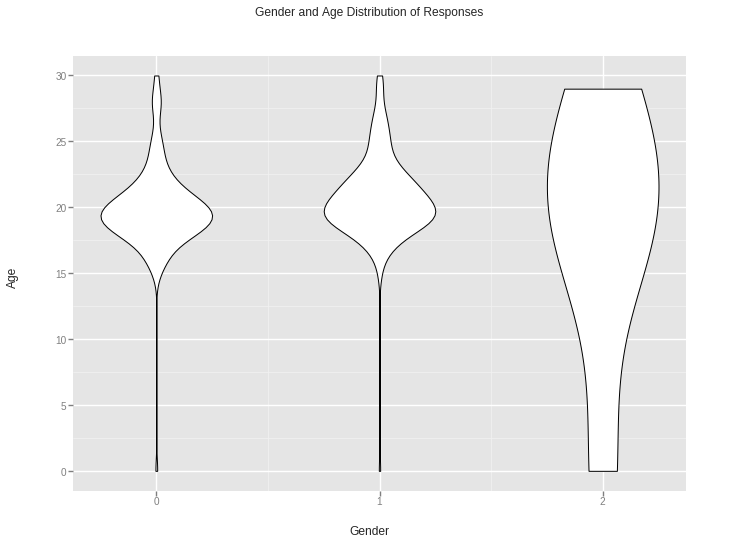

<ggplot: (8748577842275)>

In [142]:
# display information about responses
plotdata = responses.copy(deep=True)
plotdata["Gender"] = pd.factorize(plotdata['Gender'])[0]
print("Number of Responces: "+str(len(plotdata)))
print("Females: "+str(len(plotdata.loc[plotdata.Gender == 0])))
print("Males: "+str(len(plotdata.loc[plotdata.Gender == 1])))
print("Gender withheld: "+str(len(plotdata.loc[plotdata.Gender == 2])))
# create plot of spread of ages and genders of respondants
ggplot(aes(x='Gender', y='Age'), data=plotdata) +\
    geom_violin() +\
    labs(title="Gender and Age Distribution of Responses",x = "Gender",y = "Age")

0 - Female

1 - Male

2 - Gender withheld

From the violin plot we can see that the majority of responses with a specified gender are in the 16 to 30 year old range. So 16 to 30 year old men and women are about equally represented. 

Next, in order to interpret the data set and determine how each of the 150 columns relate to each other it is is essential to find a way to visualize these relationships.

To do this, look to a visualization method that can be found in another analysis of this data set done by Jekaterina Kokatjuhha[3]. This visualization displays the correlation coefficient of every column related to a variable of interest. The variable of interest here being gender. The function to create this visualization is found below. 


In [143]:
# our imported function
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize= figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y,  ax = ax)
    ax.set_ylabel("Correlation coefficients")

def correlation_plot(var_of_interest, df_main, mapping, figsize = (10,30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0,1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs
    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace = True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)
    
    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype!='object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)
    
    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype=='object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5,10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

To display the visualization call the function:

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


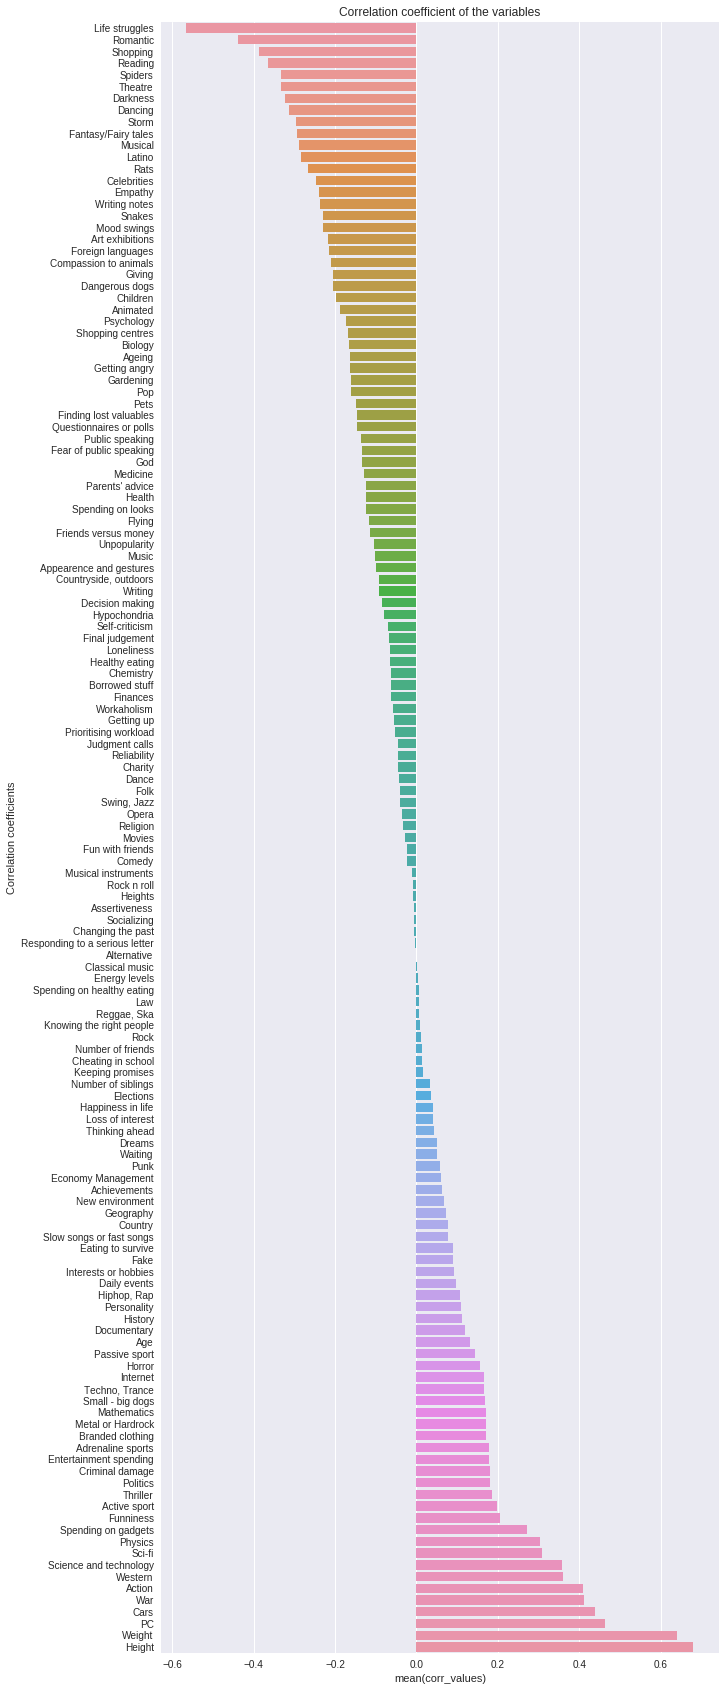

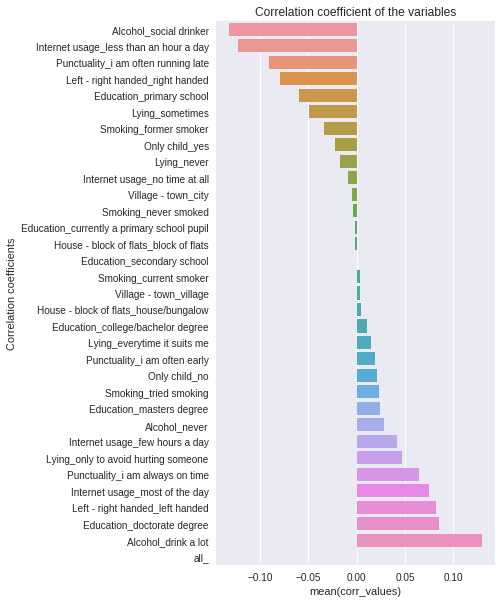

In [144]:
var_of_interest = 'Gender'
# create graphs of correlation coefficients for gender
mapping = {var_of_interest: {"female": 0, "male": 1 }}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""
corrs_area = correlation_plot(var_of_interest, young, mapping)
plt.show()

# Learning models and statistical Analysis

After seeing which values seemed to have the strogest correlation with gender, we want to see how powerful these relationships really are. To do this, we construct different decision trees and examine their accuracy in predicting a respondent's gender based on their answers to other questions.

A decision tree is essentialy a graph where each internal node represents a selection of possible values of a feature. Each edge stemming from these nodes represents one of the values. Each leaf then is the predicted value for the feature the tree is built around. The tree can predict the value of a certain feature by using the features of the input sample to travel down the tree. More information about decision trees can be found [here](http://scikit-learn.org/stable/modules/tree.html)

We choose to build trees to predict gender based on the variables in the different catergories of responses from the survey. To keep us from getting repetitive, we won't include every tree we tried, but a few of the more relavent. Some of our trees really aren't that great at predicting. Our tree based on the health responses yields the reported gender about half the time, according to the accuracy scores.

In [145]:
health['Gender'] = responses['Gender']
health = health.replace(np.NaN, False)
for column in health.columns:
    health = health[health[column] != False]

features = health.columns[[0,1,2]]
# change categorical variables to integer values
mapping1 = {'Smoking': {'never smoked': 0, 'tried smoking': 1, 'former smoker' : 2, 'current smoker' : 3}}
mapping2 = {'Alcohol': {'never': 0, 'social drinker': 1, 'drink a lot' : 2}}
health.replace(mapping1, inplace = True)
health.replace(mapping2, inplace = True)
y = pd.factorize(health['Gender'])[0]
health
# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, health[features], y, cv=10)
scores_tc

array([ 0.63      ,  0.58      ,  0.6       ,  0.53      ,  0.57      ,
        0.64646465,  0.57575758,  0.56565657,  0.51020408,  0.57142857])

Features from the spending category give us about the same degree of accuracy:

In [146]:
spending['Gender'] = responses['Gender']
spending = spending.replace(np.NaN, False)
for column in spending.columns:
    spending = spending[spending[column] != False]

features = spending.columns[[0,1,2,3,4,5,6]]
y = pd.factorize(spending['Gender'])[0]
health
# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, spending[features], y, cv=10)
scores_tc

array([ 0.59      ,  0.56      ,  0.65      ,  0.68      ,  0.62626263,
        0.60204082,  0.55102041,  0.56122449,  0.53061224,  0.5       ])

Although some runthroughs produce better results than others, these trees don't seem to predict accurately enough to be useful to us. However, other categories give much better results. Building a tree off of the opinions category predicts gender correctly over 70% of the time.

In [147]:
opinions['Gender'] = responses['Gender']
opinions = opinions.replace(np.NaN, False)
for column in opinions.columns:
    opinions = opinions[opinions[column] != False]

features = opinions.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56]]
# change categorical variables to integer values
mapping1 = {'Punctuality': {'i am often early': 0, 'i am always on time': 1, 'i am often running late' : 2}}
mapping2 = {'Lying': {'never': 0, 'only to avoid hurting someone': 1, 'sometimes' : 2, 'everytime it suits me' : 3}}
mapping3 = {'Internet usage': {'no time at all': 0, 'less than an hour a day': 1, 'few hours a day' : 2, 'most of the day' : 3}}
opinions.replace(mapping1, inplace = True)
opinions.replace(mapping2, inplace = True)
opinions.replace(mapping3, inplace = True)
y = pd.factorize(opinions['Gender'])[0]
# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, opinions[features], y, cv=10)
scores_tc

array([ 0.67816092,  0.65116279,  0.72093023,  0.74418605,  0.77906977,
        0.6627907 ,  0.77906977,  0.69767442,  0.62352941,  0.75294118])

Hobbies turn out surprisingly to be the best predictors of gender from our dataset, giving us accuracy scores from 70% up to 85% per runthrough. 

In [148]:
hobbies['Gender'] = responses['Gender']
hobbies = hobbies.replace(np.NaN, False)
for column in hobbies.columns:
    hobbies = hobbies[hobbies[column] != False]

features = hobbies.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
y = pd.factorize(hobbies['Gender'])[0]

# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, hobbies[features], y, cv=10)
scores_tc

array([ 0.79775281,  0.61797753,  0.76404494,  0.79545455,  0.71590909,
        0.76136364,  0.85227273,  0.76136364,  0.79545455,  0.73863636])

This tree actually gives us something we can work with! Before moving forward, we want to see if we can make an even better decision tree just made up of the features with the high coefficient correlations. We pick our "best" 9 features and see what the tree yields. 

In [149]:
best = pd.DataFrame()
best['Gender'] = responses['Gender']
best['Alcohol'] = health['Alcohol']
best['Romantic'] = movies['Romantic']
best['Shopping'] = hobbies['Shopping']
best['Reading'] = hobbies['Reading']
best['PC'] = hobbies['PC']
best['Cars'] = hobbies['Cars']
best['Internet'] = hobbies['Internet']
best['Internet usage'] = opinions['Internet usage']
best['Punctuality'] = opinions['Punctuality']
best = best.replace(np.NaN, False)
for column in best.columns:
    best = best[best[column] != False]

features = best.columns[[1,2,3,4,5,6,7,8,9]]
y = pd.factorize(best['Gender'])[0]

# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, best[features], y, cv=10)
scores_tc

array([ 0.72916667,  0.61702128,  0.85106383,  0.85106383,  0.86956522,
        0.7826087 ,  0.84782609,  0.69565217,  0.65217391,  0.76086957])

Unfortunately, this tree isn't any better at predicting gender than our trees based solely on hobbies and opinions, respectively. Since we still think using the features with the largest correlation coefficiants would be useful, we try another strategy: making a regression model from these features.

In [150]:
responses = responses.rename(columns={'Life struggles': 'Struggles'})
responses = responses.replace(np.NaN, False)
responses = responses[responses['Gender'] != False]
responses = responses[responses['Struggles'] != False]
responses = responses[responses['Alcohol'] != False]
responses['Gender'] = responses['Gender'].replace('female', 0)
responses['Gender'] = responses['Gender'].replace('male', 1)
gender = responses['Gender']
b = responses['Struggles']
alc = responses['Alcohol']
struggles = np.array([[s] for s in b])
# create linear regression from features with high correlation coefficients
fit = smf.ols(formula = 'gender ~ struggles + Romantic + Shopping + Reading + Spiders + Alcohol + Internet', data = responses).fit()
fit.model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 gender   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          1.15e-136
Time:                        06:28:33   Log-Likelihood:                -376.06
No. Observations:                 996   AIC:                             770.1
Df Residuals:                     987   BIC:                             814.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3205      0.070     18.996      0.000       1.184       1.457
Alcohol[T.never]              0.0258      0.040      0.639      0.523      -0.053       0.105
Alcohol[T.social drinker]    -0.0358      0.028     -1.277      0.202      -0.091       0.019
struggles                    -0.1267      0.009    -13.450      0.000      -0.145      -0.108
Romantic                     -0.0617      0.011     -5.757      0.000      -0.083      -0.041
Shopping                     -0.0690      0.010     -7.104      0.000      -0.088      -0.050
Reading                      -0.0703      0.008     -9.095      0.000      -0.085      -0.055
Spiders                      -0.0419      0.008     -5.405      0.000      -0.057      -0.027
Internet                      0.0657      0.012      5.462      0.000       0.042       0.089
==============================================================================
Omnibus:                        8.200   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.350
Skew:                           0.217   Prob(JB):                       0.0154
Kurtosis:                       2.889   Cond. No.                         53.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we've made the model, let's look at a breakdown of the fit.

In [151]:
# create anova table from our regression model
model1 = sm.stats.anova_lm(fit, typ = 2)
model1

,sum_sq,df,F,PR(>F)
Alcohol,0.500113,2.0,1.988925,1.373906e-01
struggles,22.742744,1.0,180.893383,5.486995e-38
Romantic,4.166921,1.0,33.143246,1.142410e-08
Shopping,6.345182,1.0,50.468907,2.316086e-12
Reading,10.399272,1.0,82.714711,5.095604e-19
Spiders,3.673500,1.0,29.218632,8.108630e-08
Internet,3.751323,1.0,29.837628,5.946816e-08
Residual,124.090156,987.0,NaN,NaN


Well, as we can see here, it's no perfect model. But we do gain some insights from the values present. Our p-values for the majority of the features are below .05, allowing us to reject the null hypothesis that they are not correlated with gender. This confirms our hunch from examining the correlation coefficient graphs and running our decision trees. Our F-value isn't great, suggesting the the relationship isn't that strong, but with good r-squared values, which implies points lie close to the fitted regression line, we've got something to work with. Objectively, our r-squared value is not excellent but because we are working with human reported data this is to be expected and our value is considered acceptable. 

## Kth Nearest Neighbours Outliers Detection

Because of the collection method used to collect this data it is possible that outliers exist. These outliers can interfere with the accuracy of models derived from machine learning algorithms and regressions. To combat this problem we use Kth Nearest Neighbour (KNN) algorithms. KNN essentially constructs a graph where each row of the data is a vertex and an edge is created to each of its nth nearest neighbors. Each edge also has a weight that is determined by the euclidean distance between a vertex and its neighbor. More information on KNN can be found [here](http://scikit-learn.org/stable/modules/neighbors.html).

Bellow we implement three metrics for determining if a row is an outlier, Mean Distance, Max Distance, and In Degree. Mean Distance will classify a row as an outlier if the average distance is above a given threshold. Max Distance will classify a row as an outlier if the maximum distance is above a given threshold. In Degree will classify a row as an outlier if the in degree of that row(ie. The number of other vertices on the graph that have edges to the row) is below a given threshold. These are the three methods of outlier classification addressed in [5].

First we use sklearn KNN function to find the 10 nearest neighbors for each of responses. This will return distances, the euclidean distances to each neighbor, and indices, the actual index of each neighbors.

In [152]:
# find nearest neighbors
knndata = responses.copy(deep=True)
knndata['Alcohol'] = pd.factorize(knndata['Alcohol'])[0]
knndata_array =  knndata.as_matrix(['Gender','Struggles','Romantic','Reading', 'Spiders', 'Alcohol', 'Internet'])
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(knndata_array)
distances, indices = nbrs.kneighbors(knndata_array)

Now we will calculate each of the three metrics for outliers.  For mean distance and max distance we use a threshold of 1.5 so any row with a value greater is considered an outlier. For in degree we use a threshold of 2 so anything with an in degree less than 2 is considered an outlier. These threshold values are somewhat arbitrary but based on the plots below it is apparent that not too many values will be excluded with these values.

In [153]:
mean_distance_arr = []
# calculate the mean distance
for d in distances:
    mean_distance_arr.append(np.mean(d))
outliers = list(map(lambda x: x<1.5, mean_distance_arr))
responses_mean_distance = responses.loc[outliers]

In [154]:
max_distance_arr = []
# calculate the max distance
for d in distances:
    max_distance_arr.append(np.max(d))
outliers = list(map(lambda x: x<1.5, max_distance_arr))
responses_max_distance = responses.loc[outliers]

In [155]:
responses.index = list(range(0,len(responses)))
indegree_arr = []
# calculate the Indegree
for index, _ in responses.iterrows():
    curr_indegree = 0
    for vertex in indices:
        for edge in vertex:
            if index == edge:
                curr_indegree = curr_indegree + 1
    indegree_arr.append(curr_indegree)
outliers = list(map(lambda x: x > 2, indegree_arr))
responses_indegree = responses.loc[outliers]

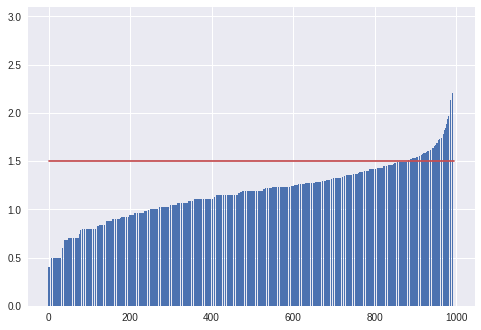

In [156]:
# plot results of mean distance
mean_distance_arr.sort()
plt.bar(responses.index, mean_distance_arr)
plt.plot(responses.index, np.ones(len(responses))*1.5,'C2')
plt.show()

In [157]:
# redo ols regression
fit = smf.ols(formula = 'Gender ~ Struggles + Romantic + Shopping + Reading + Spiders + Alcohol + Internet', data = responses_mean_distance).fit()
fit.model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Gender   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          1.99e-136
Time:                        06:28:46   Log-Likelihood:                -293.52
No. Observations:                 880   AIC:                             605.0
Df Residuals:                     871   BIC:                             648.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3763      0.082     16.753      0.000       1.215       1.538
Alcohol[T.never]              0.0183      0.045      0.405      0.686      -0.070       0.107
Alcohol[T.social drinker]    -0.0342      0.030     -1.153      0.249      -0.092       0.024
Struggles                    -0.1328      0.010    -12.908      0.000      -0.153      -0.113
Romantic                     -0.0669      0.012     -5.599      0.000      -0.090      -0.043
Shopping                     -0.0626      0.010     -6.201      0.000      -0.082      -0.043
Reading                      -0.0726      0.008     -8.989      0.000      -0.088      -0.057
Spiders                      -0.0420      0.008     -5.156      0.000      -0.058      -0.026
Internet                      0.0590      0.015      4.037      0.000       0.030       0.088
==============================================================================
Omnibus:                        8.686   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.715
Skew:                           0.243   Prob(JB):                       0.0128
Kurtosis:                       3.037   Cond. No.                         62.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

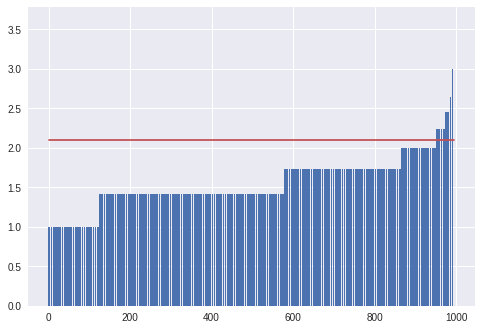

In [158]:
# plot results of max distance
max_distance_arr.sort()
plt.bar(responses.index, max_distance_arr)
plt.plot(responses.index, np.ones(len(responses))*2.1,'C2')
plt.show()

In [159]:
# redo ols regression
fit = smf.ols(formula = 'Gender ~ Struggles + Romantic + Shopping + Reading + Spiders + Alcohol + Internet', data = responses_max_distance).fit()
fit.model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Gender   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          3.08e-134
Time:                        06:28:49   Log-Likelihood:                -65.733
No. Observations:                 577   AIC:                             149.5
Df Residuals:                     568   BIC:                             188.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3268      0.092     14.400      0.000       1.146       1.508
Alcohol[T.never]              0.1089      0.068      1.592      0.112      -0.025       0.243
Alcohol[T.social drinker]     0.0038      0.035      0.110      0.912      -0.064       0.072
Struggles                    -0.1418      0.012    -11.944      0.000      -0.165      -0.119
Romantic                     -0.0501      0.014     -3.610      0.000      -0.077      -0.023
Shopping                     -0.0455      0.010     -4.421      0.000      -0.066      -0.025
Reading                      -0.0868      0.008    -10.282      0.000      -0.103      -0.070
Spiders                      -0.0535      0.009     -6.188      0.000      -0.070      -0.037
Internet                      0.0541      0.016      3.296      0.001       0.022       0.086
==============================================================================
Omnibus:                        5.901   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                7.607
Skew:                           0.077   Prob(JB):                       0.0223
Kurtosis:                       3.541   Cond. No.                         72.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

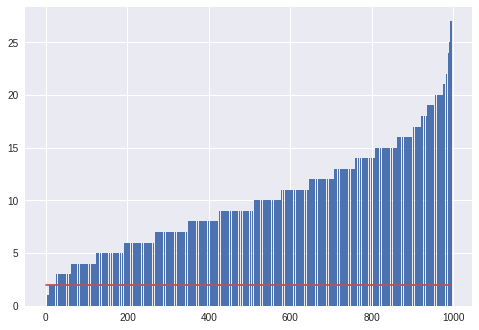

In [160]:
# plot results of in degree
indegree_arr.sort()
plt.bar(responses.index, indegree_arr)
plt.plot(responses.index, np.ones(len(responses))*2,'C2')
plt.show()

In [161]:
# redo ols regression
fit = smf.ols(formula = 'Gender ~ Struggles + Romantic + Shopping + Reading + Spiders + Alcohol + Internet', data = responses_indegree).fit()
fit.model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Gender   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sat, 16 Dec 2017   Prob (F-statistic):          4.70e-142
Time:                        06:28:53   Log-Likelihood:                -347.81
No. Observations:                 974   AIC:                             713.6
Df Residuals:                     965   BIC:                             757.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.3422      0.070     19.297      0.000       1.206       1.479
Alcohol[T.never]              0.0210      0.041      0.517      0.606      -0.059       0.101
Alcohol[T.social drinker]    -0.0378      0.028     -1.357      0.175      -0.093       0.017
Struggles                    -0.1306      0.009    -13.780      0.000      -0.149      -0.112
Romantic                     -0.0566      0.011     -5.230      0.000      -0.078      -0.035
Shopping                     -0.0710      0.010     -7.347      0.000      -0.090      -0.052
Reading                      -0.0718      0.008     -9.326      0.000      -0.087      -0.057
Spiders                      -0.0463      0.008     -6.002      0.000      -0.061      -0.031
Internet                      0.0648      0.012      5.373      0.000       0.041       0.089
==============================================================================
Omnibus:                        4.621   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.669
Skew:                           0.154   Prob(JB):                       0.0968
Kurtosis:                       2.856   Cond. No.                         53.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bellow we graph the threshold value with a red line and the values for each row as a bar chart. This is done for each metric. Then re-derive the ols model using the new dataset where we dropped the outliers determined by each metric. 

We found that we would continue our analysis with the results from the mean distance metric because it gave us good R-squared, F-statistic, and P-values. So now we will retrain the hobbies tree classifier from before with our updated dataset that has outliers removed.  

In [162]:
# re-train hobbies tree classifier 
hobbies = responses_max_distance.filter(["History", "Psychology", "Politics", "Mathematics", "Physics", "Internet", "PC", "Economy Management", "Biology", "Chemistry", "Reading", "Geography", "Foreign languages", "Medicine", "Law", "Cars", "Art exhibitions", "Religion", "Countryside, outdoors", "Dancing", "Musical instruments", "Writing", "Passive sport", "Active sport", "Gardening", "Celebrities", "Shopping", "Science and technology", "Theatre", "Fun with friends", "Adrenaline sports", "Pets"])

hobbies['Gender'] = responses_max_distance['Gender']

features = hobbies.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
y = pd.factorize(hobbies['Gender'])[0]
    
# # creat a Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf.fit(hobbies[features],y)

# # this will do a 10 fold cross validation
scores_tc = cross_val_score(clf, hobbies[features], y, cv=10)
scores_tc

array([ 0.81355932,  0.79661017,  0.84745763,  0.72413793,  0.8245614 ,
        0.85964912,  0.85964912,  0.78947368,  0.78947368,  0.77192982])

Finally we use this new classifier to attempt to assign a gender to participants who did not provide a gender response. 

In [163]:
# predict genders of 6 respondants who did not report gender
arr = clf.predict(no_gender[features])
arr

array([1, 1, 0, 1, 0, 0])

We now have the predicted genders of the six respondants who did not report gender. 0 here corresponds to female, and 1 to male. Although we have no way to confirm the genders of these respondants, upon examining other features that were not included in our model, the predictions seem reasonable. Some of the features we examined to assess our predictions were those that had high correlation coefficients in relation to gender, such as 'Alcohol' and 'Life struggles'. Others, such as 'Weight' and 'Height, also seem to correctly correspond to the estimated genders, but this lends itself to common sense. 

# Conclusion

We are now able to predict gender based on a person’s hobby using a tree classifier algorithm. While the data is from Slovenia we believe we can use and apply the created model on a global scale because gender is not specific to region. However, when applying our model there are factors we need to consider. Predominantly that our data and thus our model may contain gender bias in responses. Because the data was self-reported people could have responded without ignoring their own personal biases. This must be considered when using our model. We should also take into consideration cultural factors that may influence gender identity, and how that may impact how they form interests in different areas of life. Even with this consideration, it is interesting to examine the relationship between personal preference and gender identity in Slovenian youth. 


# Citations 
    
<a href="https://www.kaggle.com/miroslavsabo/young-people-survey">Kaggel Data Set [1]</a>

<a href="https://fses.uniba.sk/en/">The Comenius University in Bratislava [2]</a>

<a href="https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood"> We  Are From Our Childhood Study [3]</a>

<a href="https://people.duke.edu/~rnau/rsquared.htm"> R-Squared [4]</a>

<a href="http://cs.joensuu.fi/~villeh/icpr2004.pdf">Metrics for Outlier Detection with Kth Nearest Neighbors [5]</a>